In [22]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [23]:
from em_clustering import *

1. Provided Code

In [24]:
K=4
W = np.full((1, K), 1/3)
# W = np.array([[0.98, 0.01, 0.01]])

M  = np.array([[-2.0,-4,0,-3.0],[-3,1,-1,2]])
# M = np.array([[10.0, 11.0, 12.0], [10.0, 11.0, 12.0]])
# M = np.array([[-4.0, -4.1, -4.2], [0.0, 0.1, 0.2]])

In [25]:
Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
W_final, P, p = exp_max(100, K, normal_pdf, normal_train, Xmat, W, M)

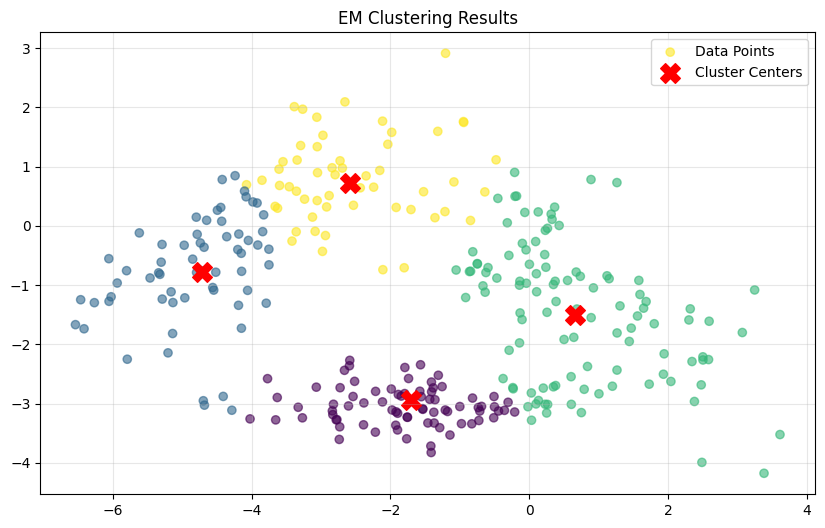

In [26]:
cluster_labels = np.argmax(p, axis=0)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Xmat[:, 0], Xmat[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(P[0, :], P[1, :], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('EM Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

2. Dataset split

In [27]:
# split dataset
np.random.seed(42)
indices = np.arange(len(Xmat))
np.random.shuffle(indices)

train_idx = indices[:int(0.8 * len(Xmat))]
test_idx = indices[int(0.8 * len(Xmat)):]

X_train = Xmat[train_idx]
X_test = Xmat[test_idx]

In [28]:
W_final, P, p = exp_max(100, 3, normal_pdf, normal_train, X_train, W, M)

In [29]:
p_test = np.zeros((3, len(X_test)))
for k in range(3):
    p_test[k, :] = W_final[0, k] * normal_pdf(P[:, k], X_test)

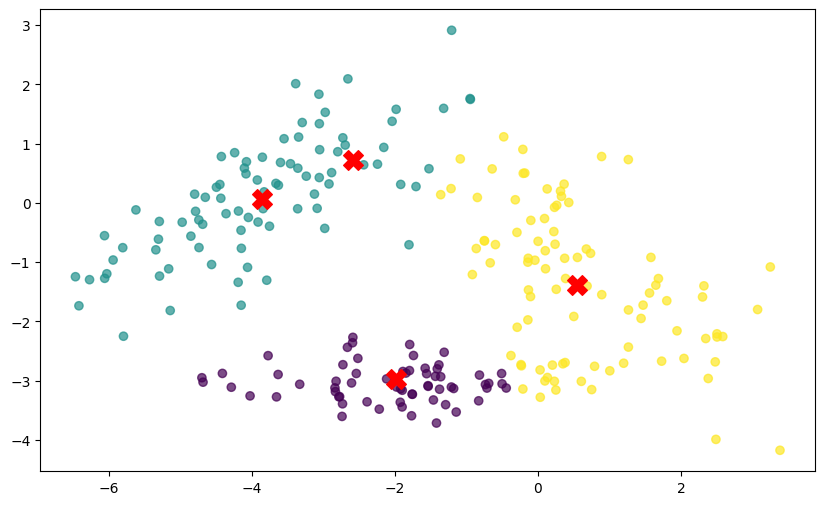

In [30]:
train_labels = np.argmax(p, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap='viridis', alpha=0.7)
plt.scatter(P[0, :], P[1, :], c='red', marker='X', s=200, label='Train Centers')
plt.show()

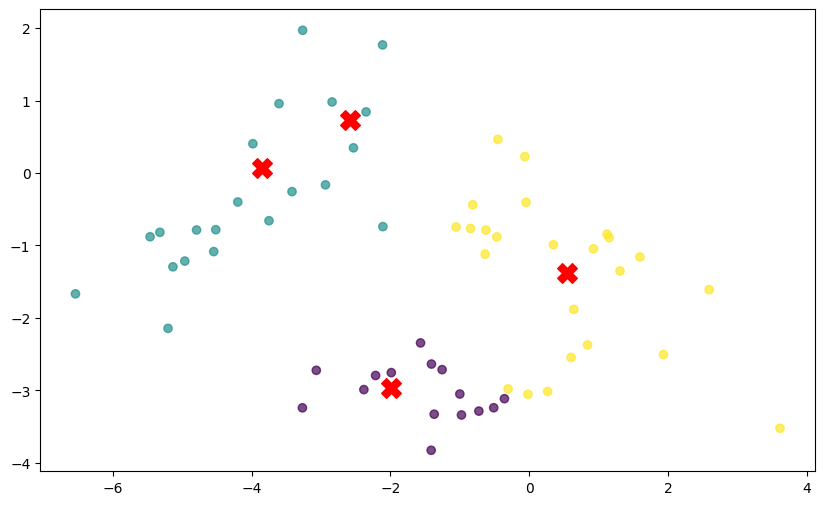

In [31]:
p_test = p_test / np.sum(p_test, axis=0)
test_labels = np.argmax(p_test, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap='viridis', alpha=0.7)
plt.scatter(P[0, :], P[1, :], c='red', marker='X', s=200, label='Train Centers')
plt.show()